In [9]:
#Provisional Machine Learning Model by Claire Golden
#Goal) input: pollution and air quality index values, 
#Goal) output: predicted values of air index quality based on existing patterns of pollutants and aqi values
#Model) Multiple Regression: estimating that pollutants steadily or drastically increase with time, also estimating that these 4 main pollutants directly effect air quality
#Training) will use data on 4 main pollutant levels from 2000-2016 and the corresponding air quality index values to train 
#End of Week 2 thoughts: Accuracy of the multiple regression is not so good, might add 4 linear regression models for each pollutant and see if those are more accurate. Also thinking of how to remove outliers for the multiple regression, maybe if I exclude aqi values over 500 or 600 I could get a more clear pattern line

In [36]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [37]:
df = pd.read_csv(r'resources/clean_combo_data.csv')
display(df)
                           

,usstate,county,local_date,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,aqi
0,Arizona,Maricopa,2000-01-01,49.0,0.040,9.0,2.2,101
1,California,Santa Cruz,2000-01-01,19.0,0.028,7.0,0.3,32
2,California,Solano,2000-01-01,26.0,0.025,3.0,0.5,61
3,District Of Columbia,District of Columbia,2000-01-01,39.0,0.014,33.0,3.6,120
4,New York,Queens,2000-01-01,38.0,0.004,26.0,1.1,104
...,...,...,...,...,...,...,...,...
326600,Maine,Cumberland,2016-05-29,15.2,0.026,1.6,0.3,25
326601,Alabama,Jefferson,2016-05-30,37.1,0.048,10.1,0.5,60
326602,Maine,Cumberland,2016-05-30,15.5,0.021,0.1,0.3,26
326603,Alabama,Jefferson,2016-05-31,34.3,0.052,22.2,0.5,64


In [38]:
df.dtypes

usstate         object
county          object
local_date      object
no2maxvalue    float64
o3maxvalue     float64
so2maxvalue    float64
comaxvalue     float64
aqi              int64
dtype: object

In [39]:
print(df.shape)

(326605, 8)


In [40]:
df.describe()

,no2maxvalue,o3maxvalue,so2maxvalue,comaxvalue,aqi
count,326605.000000,326605.000000,326605.000000,326605.000000,326605.000000
mean,25.241961,0.039541,5.709174,0.510533,57.482430
std,15.312272,0.015679,9.734395,0.486566,30.993577
min,-2.000000,0.000000,-2.000000,-0.400000,0.000000
25%,13.000000,0.029000,1.000000,0.200000,38.000000
50%,24.000000,0.038000,2.200000,0.400000,49.000000
75%,35.000000,0.049000,6.000000,0.600000,67.000000
max,244.000000,0.141000,351.000000,15.500000,1108.000000


In [41]:
#Separate clean dataframe into features and target variable 
X = df[['no2maxvalue', 'o3maxvalue', 'so2maxvalue', 'comaxvalue']].values
y = df['aqi'].values

In [42]:
#Split into training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
#Linear regression model 
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred = lin_regr.predict(X_test)
print(y_pred)

[43.09486043 43.4546495  48.14627498 ... 67.17920217 79.3713953
 97.88111403]


In [45]:
#test model with values from first row, output should be around 101
lin_regr.predict([[49.0, 0.040, 9.0, 2.2]])

array([89.65449649])

In [46]:
#examine correlation between aqi and pollutant variables
df.corr()['aqi']

no2maxvalue    0.351920
o3maxvalue     0.545639
so2maxvalue    0.120138
comaxvalue     0.221987
aqi            1.000000
Name: aqi, dtype: float64

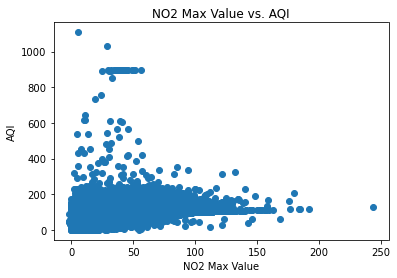

In [47]:
plt.scatter(df['no2maxvalue'], df['aqi'])
plt.xlabel('NO2 Max Value')
plt.ylabel('AQI')
plt.title('NO2 Max Value vs. AQI')
plt.show()

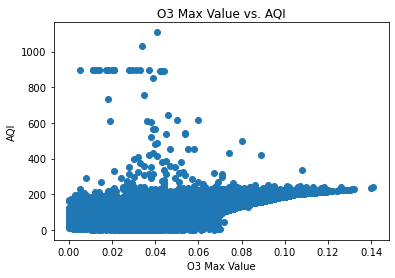

In [48]:
plt.scatter(df['o3maxvalue'], df['aqi'])
plt.xlabel('O3 Max Value')
plt.ylabel('AQI')
plt.title('O3 Max Value vs. AQI')
plt.show()

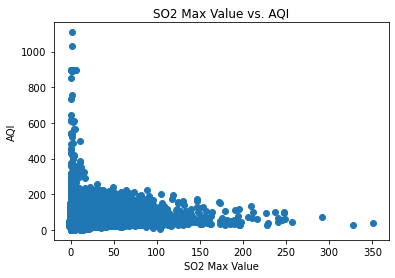

In [49]:
plt.scatter(df['so2maxvalue'], df['aqi'])
plt.xlabel('SO2 Max Value')
plt.ylabel('AQI')
plt.title('SO2 Max Value vs. AQI')
plt.show()

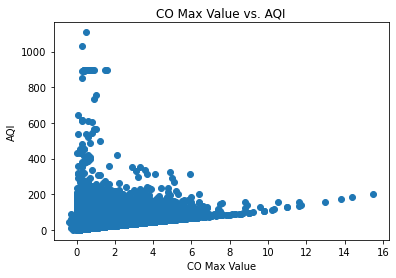

In [50]:
plt.scatter(df['comaxvalue'], df['aqi'])
plt.xlabel('CO Max Value')
plt.ylabel('AQI')
plt.title('CO Max Value vs. AQI')
plt.show()

In [14]:
lin_regr.fit(X,y)
print(lin_regr.coef_)

[4.73809568e-01 1.13508053e+03 4.12158203e-02 1.18578691e+01]


In [16]:
print(X.shape)
print(y.shape)

(326605, 4)
(326605,)


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.44725770192962944

Text(0.5, 1.0, 'Actual vs. Predicted')

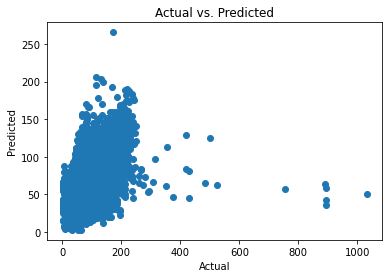

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [25]:
pred_y_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test-y_pred})
display(pred_y_df)

,Actual Value,Predicted Value,Difference
0,37,43.094860,-6.094860
1,70,43.454649,26.545351
2,41,48.146275,-7.146275
3,133,86.286742,46.713258
4,28,48.030970,-20.030970
...,...,...,...
97977,115,59.315641,55.684359
97978,179,111.071972,67.928028
97979,45,67.179202,-22.179202
97980,80,79.371395,0.628605
